In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('card_transdata.csv')

### Dataset Overview

In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [6]:
df.shape

(1000000, 8)

In [7]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

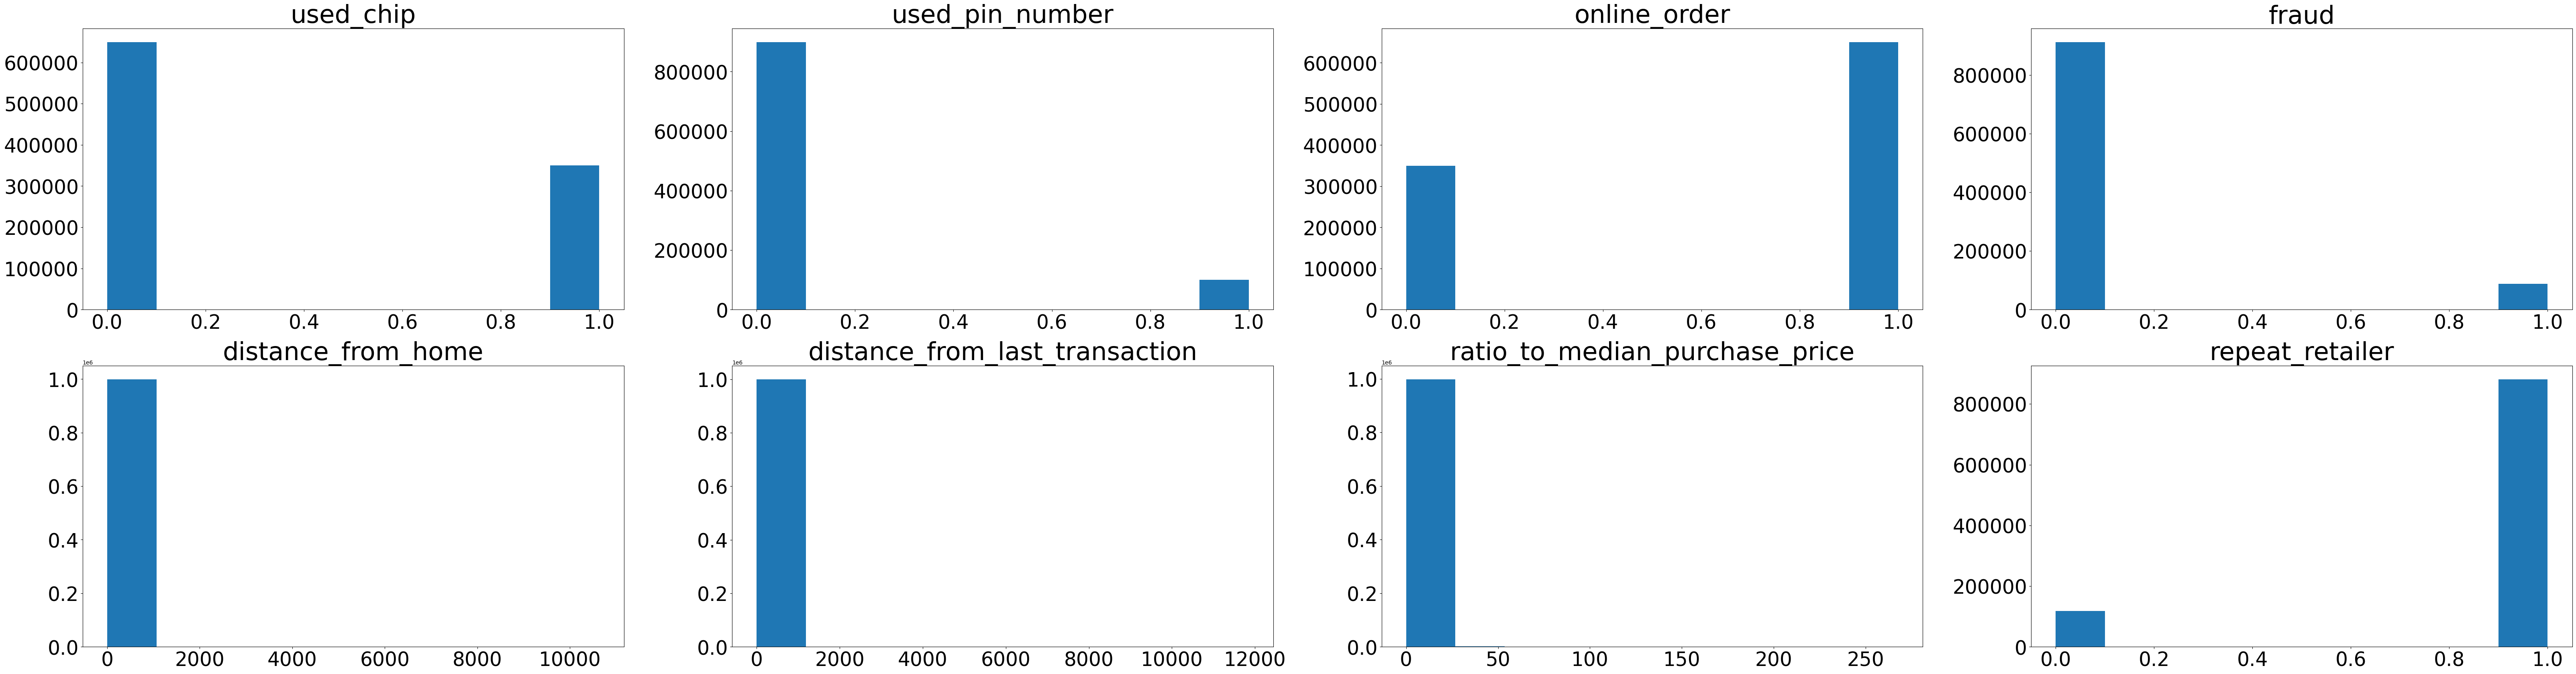

In [9]:
num_cols = len(df.columns)
num_rows = 2
fig, ax = plt.subplots(figsize=(num_cols*10, 20), nrows=num_rows, ncols=int(num_cols/num_rows))
for index, column_name in enumerate(df.columns):
    row = 0 if index+1 > num_cols/num_rows else 1
    col = index % int(num_cols/num_rows)
    ax[row][col].hist(df[column_name]);
    ax[row][col].set_title(column_name, fontsize=45)
    ax[row][col].tick_params(axis='x', labelsize=35)
    ax[row][col].tick_params(axis='y', labelsize=35)

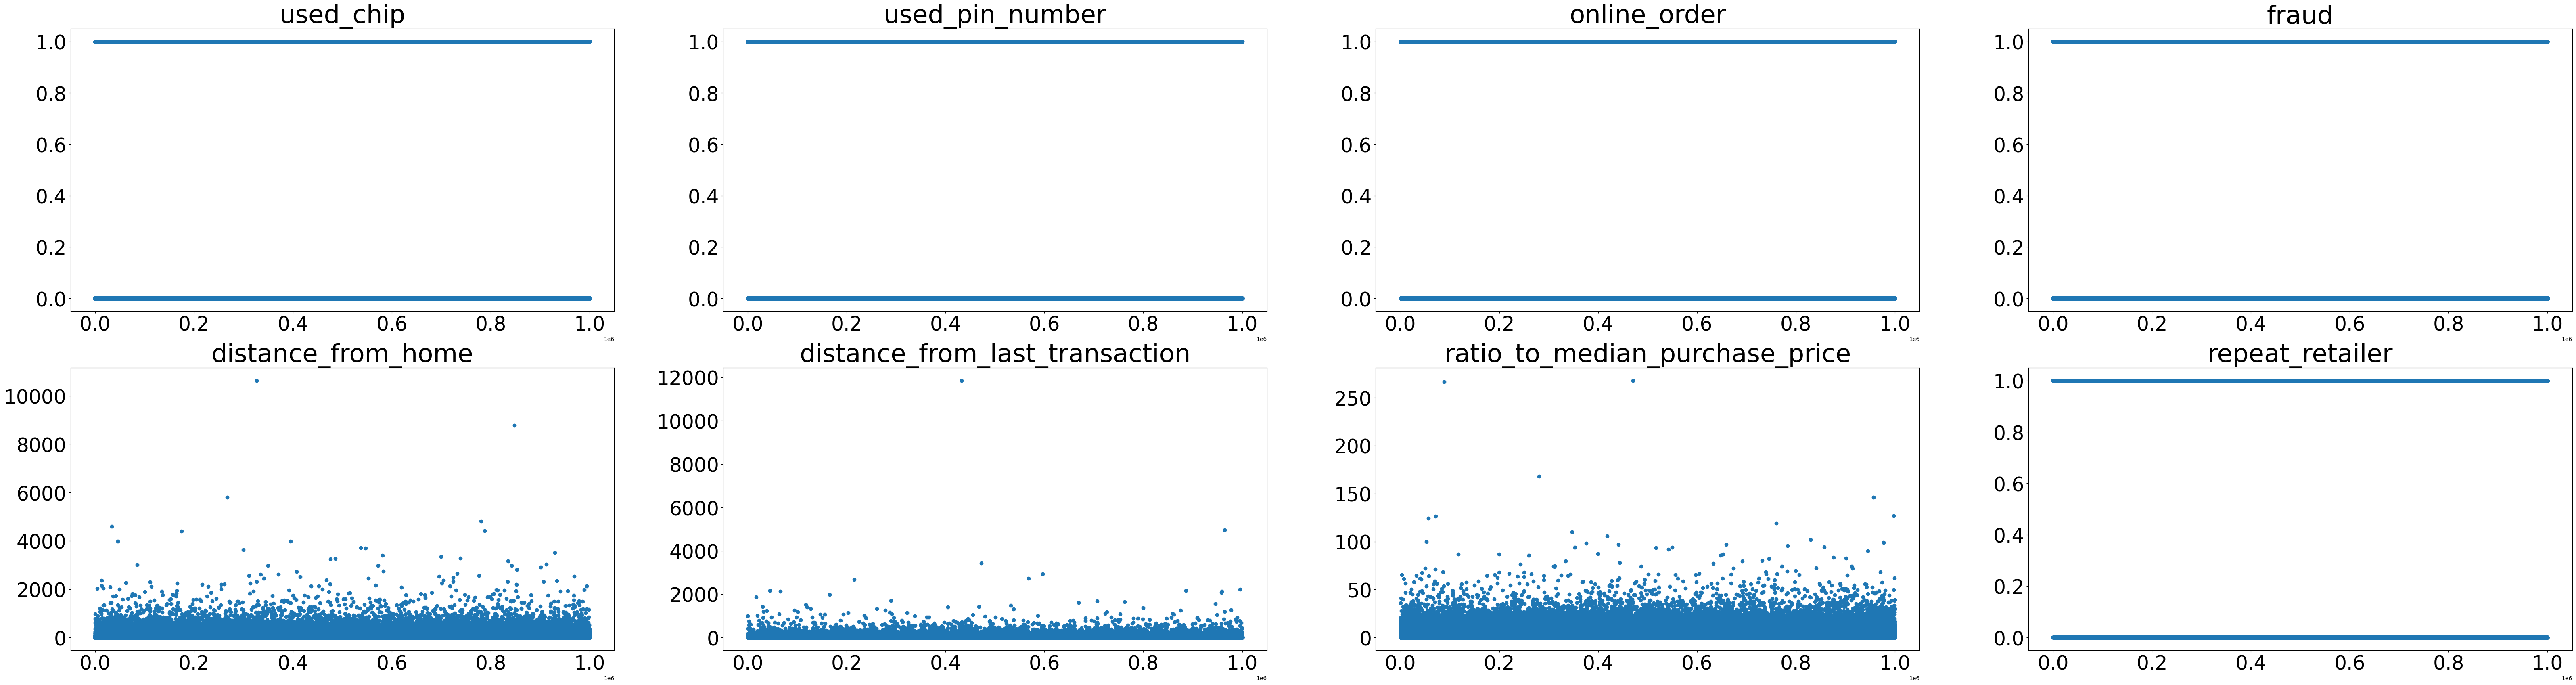

In [10]:
fig, ax = plt.subplots(figsize=(num_cols*10, 20), nrows=num_rows, ncols=int(num_cols/num_rows))
for index, column_name in enumerate(df.columns):
    row = 0 if index+1 > num_cols/num_rows else 1
    col = index % int(num_cols/num_rows)
    ax[row][col].scatter(df.index, df[column_name]);
    ax[row][col].set_title(column_name, fontsize=45)
    ax[row][col].tick_params(axis='x', labelsize=35)
    ax[row][col].tick_params(axis='y', labelsize=35)

### Dataset Clean-up

In [11]:
df.isnull().mean()

distance_from_home                0.0
distance_from_last_transaction    0.0
ratio_to_median_purchase_price    0.0
repeat_retailer                   0.0
used_chip                         0.0
used_pin_number                   0.0
online_order                      0.0
fraud                             0.0
dtype: float64

In [12]:
duplicates = df.duplicated()

In [13]:
df[duplicates].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              0 non-null      float64
 1   distance_from_last_transaction  0 non-null      float64
 2   ratio_to_median_purchase_price  0 non-null      float64
 3   repeat_retailer                 0 non-null      float64
 4   used_chip                       0 non-null      float64
 5   used_pin_number                 0 non-null      float64
 6   online_order                    0 non-null      float64
 7   fraud                           0 non-null      float64
dtypes: float64(8)
memory usage: 0.0 bytes


### Comparing security of chip and pin transactions

In [14]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [15]:
df[['used_chip', 'used_pin_number']][df['fraud'] == 1].value_counts(normalize=True)

used_chip  used_pin_number
0.0        0.0                0.740581
1.0        0.0                0.256296
0.0        1.0                0.003020
1.0        1.0                0.000103
Name: proportion, dtype: float64

In [16]:
fraud_num = df['fraud'][df['fraud'] == 1].sum()
no_chip_no_pin_fraud_num = df[(df['used_chip'] == 0) & (df['used_pin_number'] == 0) & (df['fraud'] == 1)].shape[0]
only_chip_fraud_num = df[(df['used_chip'] == 1) & (df['used_pin_number'] == 0) & (df['fraud'] == 1)].shape[0]
only_pin_fraud_num = df[(df['used_chip'] == 0) & (df['used_pin_number'] == 1) & (df['fraud'] == 1)].shape[0]
chip_and_pin_fraud_num = df[(df['used_chip'] == 1) & (df['used_pin_number'] == 1) & (df['fraud'] == 1)].shape[0]

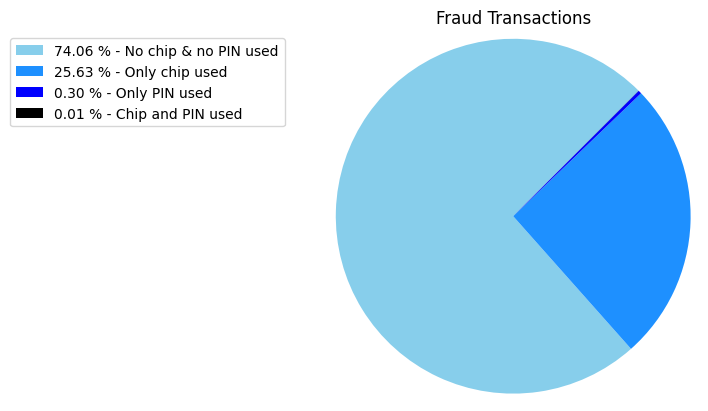

In [17]:
labels = [
    'No chip & no PIN used', 
    'Only chip used', 
    'Only PIN used', 
    'Chip and PIN used']
sizes = np.array([
    no_chip_no_pin_fraud_num, 
    only_chip_fraud_num, 
    only_pin_fraud_num, 
    chip_and_pin_fraud_num
])
colors = ['skyblue', 'dodgerblue', 'blue', 'black']
percent = 100.*sizes/sizes.sum()
labels = ['{1:2.2f} % - {0}'.format(i,j) for i,j in zip(labels, percent)]
patches, texts = plt.pie(sizes, colors=colors, startangle=45, radius=1.2)
plt.title("Fraud Transactions")
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=10)
plt.show();